<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Pradip_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

# What is IPL?

It is a shortened format of cricket. At the professional level, it was introduced by the England and Wales Cricket Board (ECB) in 2003 for the inter-county competition. In a Twenty20 game, the two teams have a single innings each, which is restricted to a maximum of 20 overs.

Twenty20 is one of the three current forms of cricket recognised by the International Cricket Council (ICC) as being at the highest international or domestic level.

A typical Twenty20 game is completed in about three hours, with each innings lasting around 90 minutes and an official 10-minute break between the innings. This is much shorter than previous forms of the game, and is closer to the timespan of other popular team sports. It was introduced to create a fast-paced game that would be attractive to spectators at the ground and viewers on television

In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube

Lets, Explore what features the data is containing.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Input file path 
path = '/content/drive/MyDrive/Capstone Project/'
# individual data frame
players_df = pd.read_excel(path + 'Players.xlsx')
deliveries_df = pd.read_csv(path + 'deliveries.csv')
matches_df = pd.read_csv(path + 'matches.csv')
teams_df = pd.read_csv(path + 'teams.csv')
most_runs_average_strikerate_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [18]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


# Players from different Country

IPL teams have players selected from different countries.

Lets explore players from which countries are included in IPL

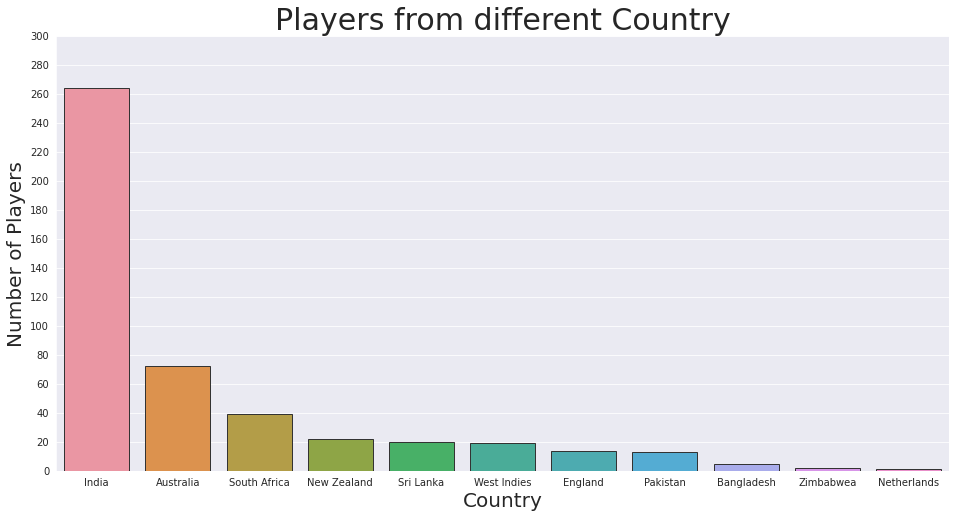

In [59]:
player_country_data = players_df.groupby('Country').count().reset_index()
player_country_data.sort_values('Player_Name', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='Country', y='Player_Name', ax=axes, data=player_country_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,301,20))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of Players', size=20)
axes.set_title('Players from different Country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


In [20]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Venue

IPL matches are played on different cities.
Let's see which city have hosted most matches.

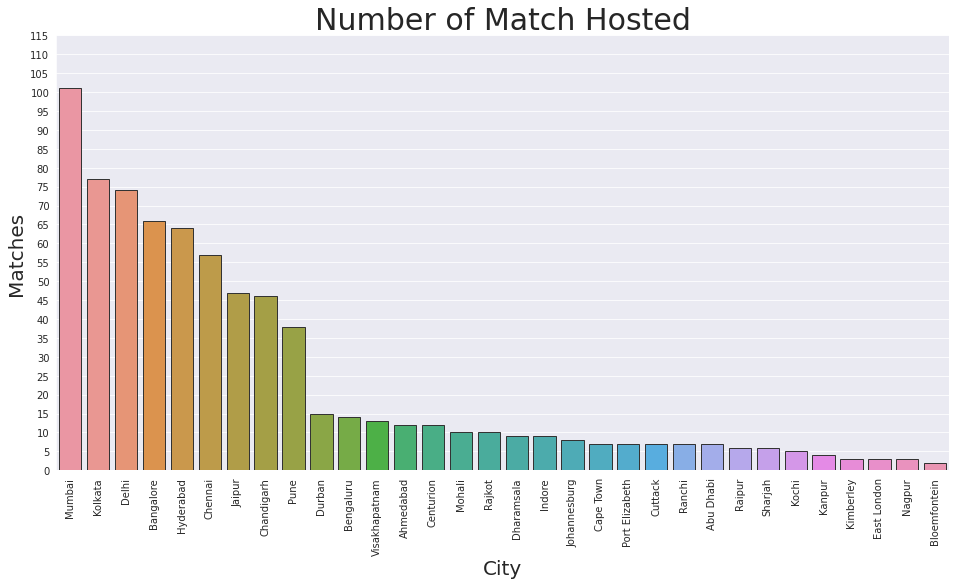

In [58]:
city_data = matches_df.groupby('city').count().reset_index()
city_data.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='city', y='id', ax=axes, data=city_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,120,5))
axes.set_xlabel('City', size=20)
axes.set_ylabel('Matches', size=20)
axes.set_title('Number of Match Hosted', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Player of the match

player of the match award is given to the outstanding player in a particular match. This can be a player from either team, although the player is generally chosen from the winning team. 

Let's see the top 50 players who gets player of the match award most frequantly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


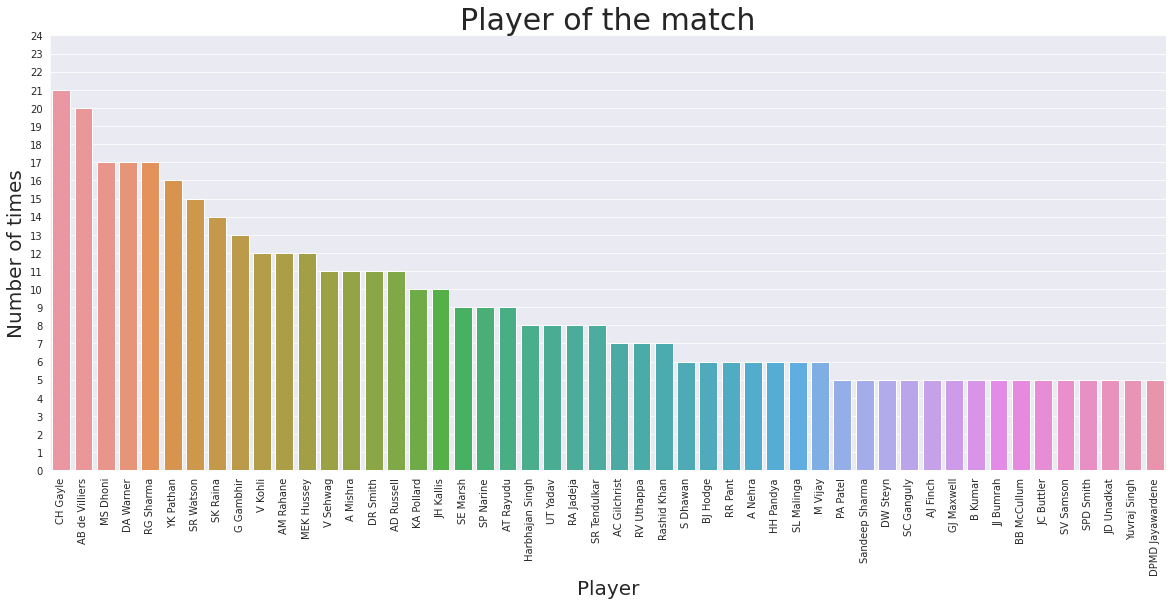

In [11]:
player_of_match_data = matches_df['player_of_match'].value_counts()
player_of_match_data = player_of_match_data[:50]
fig, axes = plt.subplots(figsize=(20,8))
sns.set_style("darkgrid")
sns.barplot(player_of_match_data.index, player_of_match_data.values,ax=axes)
axes.set_yticks(range(0,25))
axes.set_xlabel('Player', size=20)
axes.set_ylabel('Number of times', size=20)
axes.set_title('Player of the match', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# Team that win most matches

We offen intrested in finding out which team is best.

By best here we mean the team that win most matches. Let's have visual representation of data.

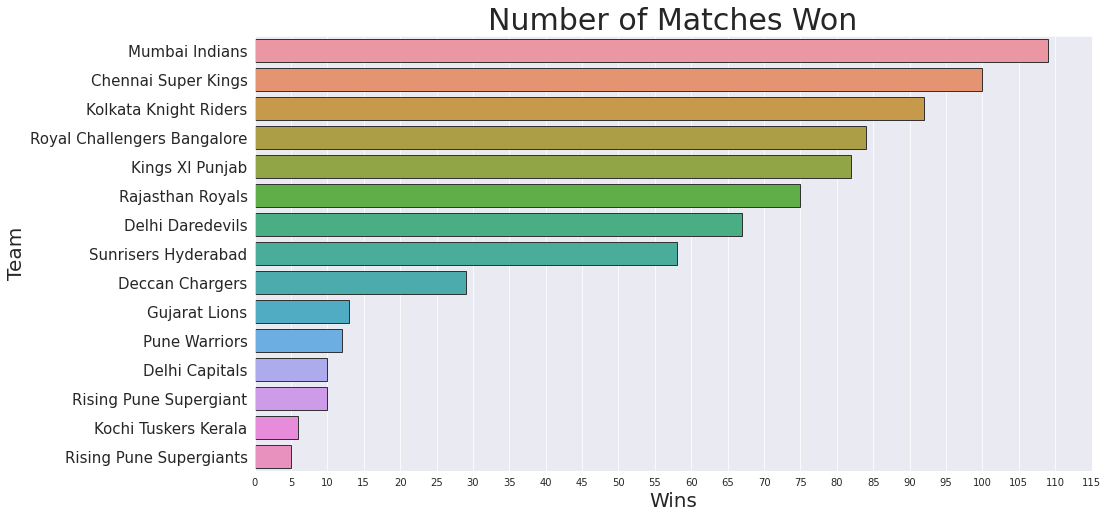

In [57]:
winner_df = matches_df.groupby('winner')['id'].count().reset_index()
winner_df.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(15,8))
sns.set_style("darkgrid")
sns.barplot(y='winner', x='id', ax=axes, data=winner_df, linewidth=1, edgecolor='0.2')
axes.set_xticks(range(0,120,5))
axes.set_ylabel('Team', size=20)
axes.set_xlabel('Wins', size=20)
axes.set_title('Number of Matches Won', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

In [ ]:
# 

In [12]:
deliveries_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
most_runs_average_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
teamwise_home_and_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
